# 10. Machine Learning Algorithm Performance Metrics

To evaluate machine learning algorithms are very important.Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how you weight the importance of different characteristics in the results and your ultimate choice of which algorithm to choose. 

10.1 Algorithm Evaluation Metrics

Recipes evaluate the same algorithms, Logistic Regression for classification and Linear
Regression for the regression problems. A 10-fold cross validation test harness is used to demonstrate each metric. In these recipes is the cross validation.cross_val_score function used to report the performance in each recipe. all scores are reported so that they can be sorted in ascending order (largest score is best). 


10.2 Classification Metrics
In this section we will review how to use the below metrics.

10.2.1 Classification Accuracy
Classification accuracy is the number of correct predictions made as a ratio of all predictions
made. This is the most common evaluation metric for classification problems. It is really only suitable when there are an equal number of observations in each class (rare case)and all predictions and prediction errors are equally important.(often not the case).

10.2.2 Logarithmic Loss

Logarithmic Loss is a performance metric for evaluating the predictions of probabilities
of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure
of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are
rewarded or punished proportionally to the confidence of the prediction.

10.2.3 Area Under ROC Curve (AUC)

Area Under ROC Curve is a performance metric for binary classificationproblems. The AUC represents a model's ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity. 
Sensitivity is the true positive rate also called the recall. It is the number of instances
from the positive (first) class that actually predicted correctly.
Specificity is also called the true negative rate. Is the number of instances from the
negative (second) class that were actually predicted correctly.

10.2.4 Confusion Matrix

Confusion Matrix presentation of the accuracy of a model with two or more classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm. 
e.g. a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction = 0 and actual = 0, whereas predictions for 0 that were actually 1 appear in the cell for prediction =0 and actual = 1, and so on. 

10.2.5 Classification Report

Classification Report while working on classification problems to give you a quick idea of the accuracy of a model using a number of measures. The classification report() function displays the precision, recall, F1-score and support for each class. 

In [7]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rawdata = read_csv('C:/Users/Satish/python_files/diabetes.csv')
array = rawdata.values
x = array[:,0:8]
y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()

################ Cross Validation Classification Accuracy ############################

# scoring = 'accuracy'
# result = cross_val_score(model, x, y, cv = kfold, scoring = scoring)
# print("Mean Accuracy: ", result.mean()*100)
# print("Standard Deviation Accuracy: ", result.std()*100)
# #### Mean Accuracy: 76.95, std Accuracy:4.84

################ Cross Validation Classification using Logarithmic Loss ###############

# scoring = 'neg_log_loss'
# result = cross_val_score(model, x, y, cv = kfold, scoring = scoring)
# print("Mean Accuracy: ", result.mean()*100)
# print("Standard Deviation Accuracy: ", result.std()*100)
#### Mean Accuracy: -49.26, std Accuracy:4.68
#### Smaller logloss is better with 0 representing a perfect logloss. From above, 
#### the measure is inverted to be ascending when using the cross val score() function.

################ Cross Validation Classification using Area Under ROC Curve (AUC) ######

# scoring = 'roc_auc'
# result = cross_val_score(model, x, y, cv = kfold, scoring = scoring)
# print("Mean Accuracy: ", result.mean()*100)
# print("Standard Deviation Accuracy: ", result.std()*100)
#### Mean Accuracy: 82.34, std Accuracy:4.07
#### AUC is relatively close to 1 and greater than 0.5, suggesting some skill in predictions

################ Cross Validation Classification using Confusion Matrix ###############

# test_size = 0.33
# seed = 7
# x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
# model.fit(x_train,y_train)
# predict = model.predict(x_test)
# matrix = confusion_matrix(y_test, predict)
# print(matrix)

### the majority of predictions fall on the diagonal line of the matrix i.e.correct predictions.

################ Cross Validation Classification using Classification Report ############

report = classification_report(y_test, predict)
print(report)
### good prediction and recall for the algorithm

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



10.3 Regression Metrics

Regression metrics, the Boston House Price dataset is used to demonstrate egression problem where all of the input variables are also numeric. Below are the most common metrics for evaluating predictions on regression machine learning. 
problems.

10.3.1 Mean Absolute Error (MAE)

The Mean Absolute Error is the sum of the absolute differences between predictions
and actual values. It gives an idea of how wrong the predictions were. The measure gives an
idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

10.3.2 Mean Squared Error (MSE) 

Mean Squared Error is much like the mean absolute error in that it provides a gross idea of the magnitude of error. Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE). 


10.3.2 R Squared Metric (R^2)

This metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature this measure is called the coeficient of determination. This is a value between 0 and 1 for no-fit and perfect fit respectively. 

In [16]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
data = read_csv('C:/Users/Satish/python_files/housing.csv', delim_whitespace=True, names=names)
# print(data.head(10))
array = data.values
x = array[:,0:13]
y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()

############# Cross Validation Regression using Mean Absolute Error #################

# scoring = 'neg_mean_absolute_error'
# result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
# print("Mean: ", result.mean())
# print("STD: ", result.std())

### Mean:-4.00    STD:2.08
### A value of 0 indicates no error or perfect predictions. Metric is inverted by the 
### cross val score() function.

############# Cross Validation Regression using Mean Squared Error #################

# scoring = 'neg_mean_squared_error'
# result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
# print("Mean: ", result.mean())
# print("STD: ", result.std())
### Mean:-34.70    STD:45.57
### This metric too is inverted so that the results are increasing. 

############# Cross Validation Regression using R^2 ##################################

# scoring = 'r2'
# result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
# print("Mean: ", result.mean())
# print("STD: ", result.std())
### Mean:0.20    STD:0.59
### the predictions have a poor fit to the actual values with a value closer to zero and less 
### than 0.5.

Mean:  0.20252899006056085
STD:  0.5952960169512264


# 11. Spot-Check Classification Algorithms

Spot-checking is a way of discovering which algorithms perform well on your machine learning
problem. You cannot know which algorithms are best suited to your problem beforehand. You must trial a number of methods and focus attention on those that prove themselves the most promising. 

11.1 Algorithm Spot-Checking

We cannot know which algorithm will work best on your dataset beforehand. We must use trial and error to discover a shortlist of algorithms that do well on the problem that we can then double down on and tune further. We can guess at what algorithms might do well on the dataset, and this can be a good starting point. Try a mixture of algorithms and see what is good at picking out the structure in the data. 
Below are some suggestions when spot-checking algorithms on your dataset:
1} Try a mixture of algorithm representations (e.g. instances and trees).
2} Try a mixture of learning algorithms (e.g. different algorithms for learning the same type
   of representation).
3} Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and
   nonparametric).

Each recipe is demonstrated on the Pima Indians onset of Diabetes dataset. A test harness
using 10-fold cross validation is used to demonstrate how to spot-check each machine learning
algorithm and mean accuracy measures are used to indicate algorithm performance. 

11.3 Linear Machine Learning Algorithms

This section demonstrates recipes for how to use two linear machine learning algorithms i.e. logistic regression and linear discriminant analysis.

11.3.1 Logistic Regression

Logistic regression assumes a Gaussian distribution for the numeric input variables and can
model binary classification problems. 

11.3.2 Linear Discriminant Analysis

Linear Discriminant Analysis or LDA is a statistical technique for binary and multiclass
classification. It too assumes a Gaussian distribution for the numerical input variables. 


11.4 Nonlinear Machine Learning Algorithms

Recipes for how to use 4 nonlinear machine learning algorithms.

11.4.1 k-Nearest Neighbors (KNN)

The k-Nearest Neighbors algorithm uses a distance metric to find the k most similar
instances in the training data for a new instance and takes the mean outcome of the neighbors
as the prediction. 

11.4.2 Naive Bayes

Naive Bayes calculates the probability of each class and the conditional probability of each class given each input value. These probabilities are estimated for new data and multiplied together, assuming that they are all independent (a simple or naive assumption). When working with real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for input variables using the Gaussian Probability Density Function. 

11.4.3 Classification and Regression Trees (CART)

Classification and Regression Trees (CART or just decision trees) construct a binary tree from
the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index)

11.4.4 Support Vector Machines (SVM)

Support Vector Machines seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes. Of particular importance is the use of different kernel functions via the kernel parameter. 

In [18]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

rawdata = read_csv('C:/Users/Satish/python_files/diabetes.csv')
array = rawdata.values
x = array[:,0:8]
y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)

######################## Logistic Regression Classification #############################
model = LogisticRegression()
result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Mean estimated accuracy = 0.769

######################## Linear Discriminant Analysis ####################################
model = LinearDiscriminantAnalysis()
result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Mean estimated accuracy = 0.773

######################## k-Nearest Neighbors Classification #############################
model  = KNeighborsClassifier()
result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Mean estimated accuracy = 0.726

######################## Gaussian Naive Bayes Classification #############################
model  = GaussianNB()
result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Mean estimated accuracy = 0.755

######################### CART Classification ############################################
model = DecisionTreeClassifier()
result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Mean estimated accuracy = 0.699

######################## Support Vector Machines Classification ##########################
model = SVC()
result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Mean estimated accuracy = 0.651


0.773462064251538


# 12. Spot-Check Regression Algorithms

Spot-checking is a way of discovering which algorithms perform well on machine learning problem. We cannot know which algorithms are best suited to the problem beforehand. We must trial a number of methods and focus attention on those that prove themselves the most promising. In this we will discover six machine learning algorithms that you can use when spot-checking your regression problem in Python with scikit-learn. 

12.2 Linear Machine Learning Algorithms

This section provides how to use four different linear machine learning algorithms for regression in Python with scikit-learn.

12.2.1 Linear Regression

Linear regression assumes that the input variables have a Gaussian distribution. It is also
assumed that input variables are relevant to the output variable and that they are not highly
correlated with each other 

12.2.2 Ridge Regression

Ridge regression is an extension of linear regression where the loss function is modified to
minimize the complexity of the model measured as the sum squared value of the coeficient values (also called the L2-norm). 

12.2.3 LASSO Regression

The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modification
of linear regression, like ridge regression, where the loss function is modified to minimize the complexity of the model measured as the sum absolute value of the coeficient values (also called the L1-norm).

12.2.4 ElasticNet Regression

ElasticNet is a form of regularization regression that combines the properties of both Ridge
Regression and LASSO regression. It seeks to minimize the complexity of the regression model
(magnitude and number of regression coeficients) by penalizing the model using both the
L2-norm (sum squared coeficient values) and the L1-norm (sum absolute coeficient values).

12.3 Nonlinear Machine Learning Algorithms

This section provides examples of how to use three different nonlinear machine learning algorithms for regression in Python with scikit-learn.

12.3.1 K-Nearest Neighbors (KNN)

The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the
training dataset for a new data instance. From the k neighbors, a mean or median output
variable is taken as the prediction. Of note is the distance metric used (the metric argument).
The Minkowski distance is used by default, which is a generalization of both the Euclidean
distance (used when all inputs have the same scale) and Manhattan distance (for when the
scales of the input variables differ). 

12.3.2 Classification and Regression Trees (CART)

CART use the training data to select the best points to split the data in order to minimize a cost metric. The default cost metric for regression decision trees is the mean squared error, specified in the criterion parameter. 

12.3.3 Support Vector Machines (SVM)

upport Vector Machines (SVM) were developed for binary classification. The technique has
been extended for the prediction real-valued problems called Support Vector Regression (SVR).


In [43]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
data = read_csv('C:/Users/Satish/python_files/housing.csv', delim_whitespace=True, names=names)
# print(data.head(10))
array = data.values
x = array[:,0:13]
y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)

############################ Linear Regression  #######################################

model = LinearRegression()
scoring  = 'neg_mean_squared_error'
result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
# print(result.mean())
### Mean estimated accuracy = -34.70

############################ Ridge Regression  #######################################

model = Ridge()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
# print(result.mean())
### Mean estimated accuracy = -34.07


############################ Lasso Regression  #######################################

model = Lasso()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
# print(result.mean())
### Mean estimated accuracy = -34.46

############################ ElasticNet Regression  #######################################

model = ElasticNet()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
# print(result.mean())
### Mean estimated accuracy = -34.16

############################ KNN Regression  #######################################

model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
# print(result.mean())
### Mean estimated accuracy = -107.28

############################ CART Regression  #######################################

model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
# print(result.mean())
### Mean estimated accuracy = -35.65

############################ SVR Regression  #######################################

model = SVR()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(result.mean())
### Mean estimated accuracy = -91.04

-91.04782433324428


# 13. Compare Machine Learning Algorithms

It is important to compare the performance of multiple different machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. 

13.1 Choose The Best Machine Learning Model

While working on machine learning project, we often end up with multiple good models to choose from and each model will have different performance characteristics.Using resampling methods like cross validation, you can get an estimate for how accurate each model may be on unseen data. We need to be able to use these estimates to choose one or two best models from the suite of models that we have created.
When we have a new dataset, it is a good idea to visualize the data using different techniques
in order to look at the data from different perspectives. The same idea applies to model selection. We should use a number of different ways of looking at the estimated accuracy of  machine learning algorithms in order to choose the one or two algorithm to finalize.

13.2 Compare Machine Learning Algorithms Consistently

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. This can be achieve by forcing each algorithm to be evaluated on a consistent test harness. 
In the example below six different classification algorithms are compared on a single dataset using diabetes dataset which has two classes and eight numeric input variables of varying scales. The 10-fold cross validation procedure is used to evaluate each algorithm with the same random seed to ensure that the same splits to the training data are performed and that each algorithm is evaluated in precisely the same way. 

1} Logistic Regression.
2} Linear Discriminant Analysis.
3} k-Nearest Neighbors.
4} Classification and Regression Trees.
5} Naive Bayes.
6} Support Vector Machines.


LR 0.7695146958304853 0.04841051924567195
LDA 0.773462064251538 0.05159180390446138
KNN 0.7265550239234451 0.06182131406705549
GNB 0.7551777170198223 0.04276593954064409
CART 0.6900034176349965 0.06249622191574835
SVM 0.6510252904989747 0.07214083485055327


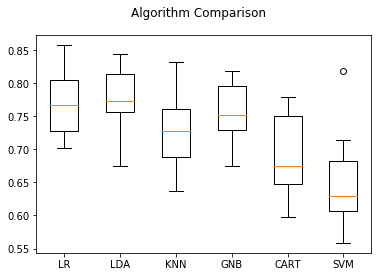

In [2]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

rawdata = read_csv('C:/Users/Satish/python_files/diabetes.csv')
array = rawdata.values
x = array[:,0:8]
y = array[:,8]


#### Prepare model
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

#### EValuate each model in turn 
result = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(name, cv_result.mean(), cv_result.std())
    
#box plot algorithm comparison    
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(result)
ax.set_xticklabels(names)
pyplot.show()

#### From these results, it would suggest that both logistic regression and linear discriminant
#### analysis are perhaps worthy of further study on this problem.

# 14. Automate ML Workflows with Pipelines

There are standard workflows in a machine learning project that can be automated. In Python
scikit-learn, Pipelines help to clearly define and automate these workflows. 

14.1 Automating Machine Learning Workflows

There are standard workflows in applied LM to overcome common problems like data leakage in the test harness. Python scikit-learn provides a Pipeline utility to help automate machine learning workflows by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.
The goal is to ensure that all of the steps in the pipeline are constrained to the data available for the evaluation, such as the training dataset or each fold of the cross validation procedure.

14.2 Data Preparation and Modeling Pipeline

An easy trap to fall into in applied ML is leaking data from training dataset to test dataset. 
To avoid this trap we need a robust test harness with strong separation of training and testing including data preparation. Data preparation is one easy way to leak knowledge of the whole training dataset to the algorithm. 
e.g. preparing your data using normalization or standardization on the entire training dataset before learning would not be a valid test because the training dataset would have been influenced by the scale of the data in the test set. 
Pipelines help to prevent data leakage in the test harness by ensuring that data preparation
like standardization is constrained to each fold of cross validation procedure. The example below demonstrates this important data preparation and model evaluation workflow on the diabetes dataset. 
The pipeline is defined with two steps
1} Standardize the data.
2} Learn a Linear Discriminant Analysis model.
The pipeline is then evaluated using 10-fold cross validation.



In [20]:
####### Create a pipeline that standardizes the data then creates a model ###########
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rawdata = read_csv('C:/Users/Satish/python_files/diabetes.csv')
array = rawdata.values
x = array[:,0:8]
y = array[:,8]

### Create the Pipeline with list of steps
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('LDA', LinearDiscriminantAnalysis()))
model = Pipeline(estimators) # provide list of steps to Pipeline for process the data

### Evaluate the Pipeline
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(model, x, y, cv=kfold)
print(result.mean())
#### Mean Accuracy = 0.77
#### The Pipeline itself is treated like an estimator and evaluated entirety by the k-fold 
#### cross validation procedure.

0.773462064251538


14.3 Feature Extraction and Modeling Pipeline

Feature extraction is procedure that is susceptible to data leakage. Like data preparation,
feature extraction procedures must be restricted to the data in training dataset. The pipeline provides a handy tool called the FeatureUnion which allows the results of multiple feature selection and extraction procedures to be combined into a larger dataset on which a model can be trained. Importantly, all the feature extraction and the feature union occurs within each fold of the cross validation procedure. 
The example below demonstrates the pipeline defined with four steps
1} Feature Extraction with Principal Component Analysis (3 features).
2} Feature Extraction with Statistical Selection (6 features).
3} Feature Union.
4} Learn a Logistic Regression Model.
The pipeline is then evaluated using 10-fold cross validation.

In [11]:
####### Create a pipeline that extracts feature from the data then creates a model ###########
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

rawdata = read_csv('C:/Users/Satish/python_files/diabetes.csv')
array = rawdata.values
x = array[:,0:8]
y = array[:,8]

### create feature Union 
features = []
features.append(('pca', PCA(n_components=3))) # step 1 Feature extraction with PCA, 3 component
features.append(('select_best', SelectKBest(k=6))) #step 2 Feature selection with selectKbest
feature_union = FeatureUnion(features) #FeatureUnion is it's own Pipeline of PCA and selectKbest

### create Pipeline
estimators = []
estimators.append(('feature_union', feature_union)) # FeatureUnion feed to  final pipeline
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators) # Final pipeline with FeatureUnion and  LogisticRegression

### Evaluate the Pipeline
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(model, x, y, cv=kfold)
print(result.mean())
### Mean Accuracy =  0.776

0.7760423786739576


# 15. Improve Performance with Ensembles

Ensembles can give a boost in accuracy on the dataset. 

15.1 Combine Models Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:
1} Bagging -  Building multiple models (typically of the same type) from different subsamples
              of the training dataset.
2} Boosting - Building multiple models (typically of the same type) each of which learns to
              fix the prediction errors of a prior model in the sequence of models.
3} Voting - Building multiple models (typically of differing types) and simple statistics (like
            calculating the mean) are used to combine predictions.
            
15.2 Bagging Algorithms

Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The final output prediction is averaged across the predictions of all of the sub-models. 

15.2.1 Bagged Decision Trees

Bagging performs best with algorithms that have high variance. A popular example are
decision trees, often constructed without pruning. 
The example below is an example of using the BaggingClassifier with the Classification and Regression Trees algorithm (DecisionTreeClassifier). A total of 100 trees are created.

15.2.2 Random Forest

Random Forests is an extension of bagged decision trees. Samples of the training dataset are
taken with replacement, but the trees are constructed in a way that reduces the correlation
between individual classiers. Rather than greedily choosing the best split point in
the construction of each tree, only a random subset of features are considered for each split. 

15.2.3 Extra Trees

Extra Trees are modification of bagging where random trees are constructed from samples of the training dataset. 

15.3 Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a final
output prediction. 

15.3.1 AdaBoost

AdaBoost works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or less attention to them in the construction of subsequent models. 

15.3.2 Stochastic Gradient Boosting

tochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles. You can construct a
Gradient Boosting model for classification using the GradientBoostingClassifier class.
    
15.4 Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning
algorithms. It works by first creating two or more standalone models from training dataset.
A Voting Classifier can then be used to wrap the models and average the predictions of the
sub-models when asked to make predictions for new data. The predictions of the sub-models can
be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from sub-models, but this is called stacking (stacked aggregation). 

In [29]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rawdata = read_csv('C:/Users/Satish/python_files/diabetes.csv')
array = rawdata.values
x = array[:,0:8]
y = array[:,8]
seed = 7
kfold = KFold(n_splits=10, random_state=7)

################# Bagged Decision Trees for Classification ####################
# num_trees = 100
# cart = DecisionTreeClassifier()
# model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
# result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Estimated mean Accuracy = 0.77

#################### Random Forest Classification ##############################
# max_feature = 3
# num_trees = 100
# model = RandomForestClassifier(n_estimators=num_trees, max_features=max_feature)
# result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Estimated mean Accuracy = 0.772

#################### Extra trees Classification ##############################
# max_feature = 7
# num_trees = 100
# model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_feature)
# result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Estimated mean Accuracy = 0.755

#################### AdaBoost Classification ####################################
# max_feature = 7
# model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_feature)
# result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Estimated mean Accuracy = 0.772

#################### Stochastic Gradient Boosting Classification #####################

num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
result = cross_val_score(model, x, y, cv=kfold)
print(result.mean())
### Estimated mean Accuracy = 0.766

#################### Voting Ensemble for Classification ###############################
##### create sub models

# estimator = []
# estimator.append(('cart', DecisionTreeClassifier()))
# estimator.append(('logic', LogisticRegression()))
# estimator.append(('svm', SVC()))
# model = VotingClassifier(estimator)
# result = cross_val_score(model, x, y, cv=kfold)
# print(result.mean())
### Estimated mean Accuracy = 0.739

0.7669002050580999


# 16. Improve Performance with Algorithm Tuning

Machine learning models are parameterized so that their behavior can be tuned for a given
problem. Models can have many parameters and finding the best combination of parameters can
be treated as a search problem. 

16.1 Machine Learning Algorithm Parameters

Algorithm tuning is a final step in the process of applied machine learning before finalizing your model. It is sometimes called hyperparameter optimization where the algorithm parameters
are referred to as hyperparameters, whereas the coeficients found by the machine learning
algorithm itself are referred to as parameters. Optimization suggests the search-nature of the
problem. We can use different search strategies to find a good and robust parameter or set of parameters for an algorithm on a given problem. 

16.2 Grid Search Parameter Tuning

Grid search is an approach to parameter tuning that will methodically build and evaluate a
model for each combination of algorithm parameters specified in a grid. The example below evaluates different alpha values for the Ridge Regression algorithm on the diabetes dataset performing a grid search using the GridSearchCV class.

16.3 Random Search Parameter Tuning

Random search is an approach to parameter tuning that will sample algorithm parameters from
a random distribution (i.e. uniform) for a fixed number of iterations. A model is constructed
and evaluated for each combination of parameters chosen. A random search for algorithm parameters using the RandomizedSearchCV class.
The example below evaluates different random alpha values between 0 and 1 for the Ridge Regression algorithm on the diabetes dataset.  total of 100 iterations are performed with uniformly random alpha values selected in the range between 0 and 1 

In [31]:
import numpy
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rawdata = read_csv('C:/Users/Satish/python_files/diabetes.csv')
array = rawdata.values
x = array[:,0:8]
y = array[:,8]

#################### Grid search for algorithm Tunning ###############################
# alph = numpy.array([1,0.1,0.01,0.001,0.0001,0])
# param_grid = dict(alpha=alph)
# model = Ridge()
# grid = GridSearchCV(estimator=model, param_grid=param_grid)
# grid.fit(x, y)
# print(grid.best_score_) # best_score = 0.279 ## the optimal score achieved 
# print(grid.best_estimator_.alpha) # alpha = 1.0 parameters in the grid that achieved that score

#################### Randomized for algorithm Tunning ###############################
param_grid = {'alpha': uniform()}
model = Ridge()
search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, 
                            random_state=7)
search.fit(x, y)
print(search.best_score_) # 0.279
print(search.best_estimator_.alpha) # 0.977  optimal alpha value near 1.0 is discovered.

0.27961712703051084
0.9779895119966027


# 17. Save and Load ML Models

Finding an accurate machine learning model is not the end of the project. We need to save model to file and load it later in order to make predictions. 

17.1 Finalize Your Model with pickle

Pickle is the standard way of serializing objects in Python. We can use the pickle
operation to serialize machine learning algorithms and save the serialized format to a file. Later We can load this file to deserialize the model and use it to make new predictions. 
The example demonstrates how to train model on dataset, save model and load it make prediction on unseen data.

17.2 Finalize Your Model with Joblib

The Joblib library is part of the SciPy ecosystem and provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently. This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors). 
The example below demonstrates how you can train a logistic regression model on the diabetes dataset, save the model to file using Joblib and load it to make predictions on the unseen test set.

In [67]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from pickle import dump
# from pickle import load
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

rawdata = read_csv('C:/Users/Satish/python_files/diabetes.csv')
array = rawdata.values
x = array[:,0:8]
y = array[:,8]

##### split the dataset and train the model 
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
model = LogisticRegression()
model.fit(x_train, y_train)

#################### Save model using Pickle ###############################
##### save model on local disk
# filename = 'final_model.sav'
# dump(model, open(filename, 'wb'))

#### load the model from disk and make prediction
# loaded_model = load(open(filename, 'rb'))
# result = loaded_model.score(x_test, y_test)
# print(result)

#################### Save model using Joblib ###############################
##### save model on local disk
filename = 'final_model23.sav'
dump(model, filename)

#### load the model from disk and make prediction
loaded_model = load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

## the model saves a file as final_model23.sav on local disk and creates one file for each 
## NumPy array in the model 
## After the model is loaded an estimate of the accuracy of the model on unseen data. 

0.7559055118110236
